<a href="https://colab.research.google.com/github/westlfower/pythone/blob/main/1223%EB%B0%A9%EA%B3%BC%ED%9B%84_opencv%EC%BA%90%EB%A6%AD%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow
from google.colab import files
import os

🎨 각 방향별 픽셀 캐릭터 생성 중...

FRONT 방향:


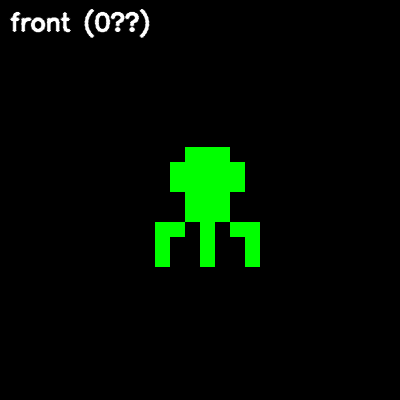

None

✅ pixel_character_sprites/front_sprite.png 저장 완료!

LEFT 방향:


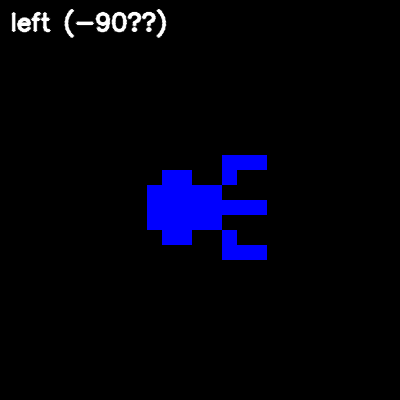

None

✅ pixel_character_sprites/left_sprite.png 저장 완료!

BACK 방향:


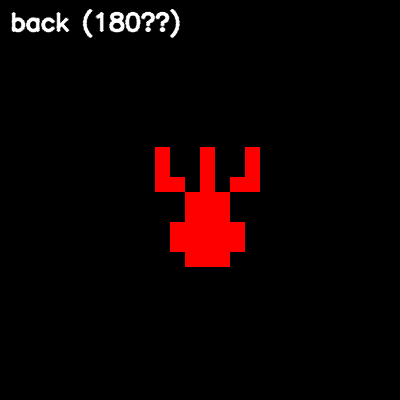

None

✅ pixel_character_sprites/back_sprite.png 저장 완료!

RIGHT 방향:


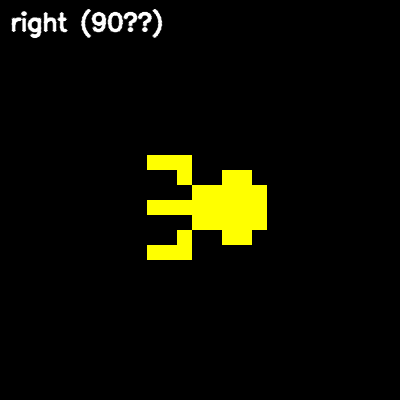

None

✅ pixel_character_sprites/right_sprite.png 저장 완료!
updating: pixel_character_sprites/ (stored 0%)
updating: pixel_character_sprites/left_sprite.png (deflated 29%)
updating: pixel_character_sprites/back_sprite.png (deflated 30%)
updating: pixel_character_sprites/right_sprite.png (deflated 29%)
updating: pixel_character_sprites/front_sprite.png (deflated 33%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📥 pixel_sprites.zip 다운로드 완료!
📁 포함 파일: front_sprite.png, left_sprite.png, back_sprite.png, right_sprite.png


In [3]:
import cv2 # OpenCV 라이브러리를 임포트합니다. 이미지 처리 기능을 제공합니다.
import numpy as np # NumPy 라이브러리를 임포트합니다. 배열 및 행렬 연산에 사용됩니다.
import math # 수학 함수(예: 삼각함수)를 사용하기 위해 math 모듈을 임포트합니다.
from google.colab.patches import cv2_imshow # Colab에서 OpenCV 이미지를 표시하기 위한 함수를 임포트합니다.
from google.colab import files # Colab에서 파일을 다운로드하는 기능을 임포트합니다.
import os # 운영 체제 기능(예: 디렉토리 생성)을 사용하기 위해 os 모듈을 임포트합니다.

# ----- 1. 기본 설정 ----- # 주석: 이미지의 크기, 스케일, 중앙 위치 등 기본 설정을 정의합니다.
W, H = 400, 400 # 이미지의 너비(W)와 높이(H)를 각각 400픽셀로 설정합니다.
SCALE = 15 # 픽셀 캐릭터의 각 '픽셀' 크기를 15로 설정합니다.
CENTER = np.array([W // 2, H // 2], dtype=np.float32) # 이미지의 중앙 좌표를 계산하고 float32 타입의 NumPy 배열로 저장합니다.

# ----- 2. 픽셀 캐릭터 정의 (정면 기준) ----- # 주석: 픽셀 캐릭터의 형태를 2D 배열로 정의합니다.
sprite = np.array([ # 8x7 크기의 2차원 NumPy 배열을 생성하여 캐릭터의 픽셀 형태를 나타냅니다.
    [0,0,1,1,1,0,0],
    [0,1,1,1,1,1,0],
    [0,1,1,1,1,1,0],
    [0,0,1,1,1,0,0],
    [0,0,1,1,1,0,0],
    [1,1,0,1,0,1,1],
    [1,0,0,1,0,0,1],
    [1,0,0,1,0,0,1],
], dtype=np.uint8) # 배열의 요소 타입을 부호 없는 8비트 정수(0 또는 1)로 지정합니다.

h_sprite, w_sprite = sprite.shape # 정의된 스프라이트 배열의 높이(h_sprite)와 너비(w_sprite)를 가져옵니다.

# ----- 3. 회전 함수 ----- # 주석: 주어진 점들을 특정 각도만큼 회전시키는 함수를 정의합니다.
def rotate_points(points, angle_deg): # 점들의 배열과 회전할 각도(도 단위)를 인자로 받습니다.
    theta = math.radians(angle_deg) # 도 단위의 각도를 라디안으로 변환합니다.
    c, s = math.cos(theta), math.sin(theta) # 코사인 값(c)과 사인 값(s)을 계산합니다.
    R = np.array([[c, -s], [s,  c]], dtype=np.float32) # 2D 회전 행렬 R을 생성합니다.
    return (R @ points.T).T # 회전 행렬 R과 점들의 전치 행렬을 곱한 후 다시 전치하여 회전된 점들을 반환합니다.

# ----- 4. 스프라이트 그리기 함수 ----- # 주석: 이미지에 픽셀 캐릭터를 그리는 함수를 정의합니다.
def draw_sprite(img, angle_deg, color=(0, 255, 0)): # 이미지, 회전 각도, 색상을 인자로 받습니다.
    ys, xs = np.where(sprite == 1) # sprite 배열에서 값이 1인 픽셀의 y, x 좌표를 찾습니다.
    points = np.stack([xs, ys], axis=1).astype(np.float32) # 찾은 좌표들을 (x, y) 형태의 배열로 변환합니다.

    cx = (w_sprite - 1) / 2.0 # 스프라이트의 중심 x 좌표를 계산합니다.
    cy = (h_sprite - 1) / 2.0 # 스프라이트의 중심 y 좌표를 계산합니다.
    points_centered = points - np.array([[cx, cy]]) # 모든 점들을 스프라이트의 중심을 기준으로 이동시킵니다.

    rotated = rotate_points(points_centered, angle_deg) # 중심이 조정된 점들을 주어진 각도만큼 회전시킵니다.

    for p in rotated: # 회전된 각 점(p)에 대해 반복합니다.
        x, y = p * SCALE # 점의 좌표에 SCALE을 곱하여 실제 이미지에서의 크기를 조정합니다.
        px = int(CENTER[0] + x) # 이미지 중앙을 기준으로 픽셀의 x 좌표를 계산합니다.
        py = int(CENTER[1] + y) # 이미지 중앙을 기준으로 픽셀의 y 좌표를 계산합니다.
        cv2.rectangle(img, (px, py), (px + SCALE - 1, py + SCALE - 1), color, -1) # 계산된 위치에 사각형(픽셀)을 그립니다. -1은 사각형을 채움을 의미합니다.

# ----- 5. 각 방향별 PNG 저장 + 미리보기 ----- # 주석: 정의된 방향에 따라 캐릭터 이미지를 생성하고 저장 및 표시합니다.
directions = { # 네 가지 방향(front, left, back, right)에 대한 각도와 색상 정보를 딕셔너리로 정의합니다.
    "front": {"angle": 0, "color": (0, 255, 0)},     # 초록 (정면: 0도 회전)
    "left": {"angle": -90, "color": (255, 0, 0)},    # 파랑 (왼쪽: -90도 회전)
    "back": {"angle": 180, "color": (0, 0, 255)},    # 빨강 (뒤: 180도 회전)
    "right": {"angle": 90, "color": (0, 255, 255)}   # 노랑 (오른쪽: 90도 회전)
}

# 폴더 생성 # 주석: 이미지를 저장할 디렉토리를 생성합니다.
os.makedirs("pixel_character_sprites", exist_ok=True) # "pixel_character_sprites"라는 이름의 디렉토리를 생성합니다. 이미 존재하면 오류를 발생시키지 않습니다.

print("🎨 각 방향별 픽셀 캐릭터 생성 중...") # 사용자에게 현재 진행 상황을 알리는 메시지를 출력합니다.

for dir_name, info in directions.items(): # directions 딕셔너리의 각 항목(방향 이름과 정보)에 대해 반복합니다.
    # 이미지 생성 # 주석: 각 방향에 대한 빈 이미지를 생성하고 캐릭터를 그립니다.
    img = np.zeros((H, W, 3), dtype=np.uint8) # 높이 H, 너비 W, 3채널(BGR)을 가진 검은색 빈 이미지를 생성합니다.
    draw_sprite(img, info["angle"], info["color"]) # 현재 방향의 각도와 색상으로 스프라이트를 이미지에 그립니다.

    # 텍스트 추가 # 주석: 이미지에 방향 정보 텍스트를 추가합니다.
    cv2.putText(img, f"{dir_name} ({info['angle']}°)", # 이미지에 텍스트를 추가합니다. 텍스트는 방향 이름과 각도입니다.
                (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, # 텍스트 위치, 폰트, 크기를 지정합니다.
                (255, 255, 255), 2, cv2.LINE_AA) # 텍스트 색상(흰색), 두께, 선 종류를 지정합니다.

    # PNG 저장 # 주석: 생성된 이미지를 PNG 파일로 저장합니다.
    filename = f"pixel_character_sprites/{dir_name}_sprite.png" # 저장할 파일 이름을 형식화합니다.
    cv2.imwrite(filename, img) # 이미지를 지정된 파일 이름으로 저장합니다.

    # 코랩 미리보기 # 주석: Colab 환경에서 생성된 이미지를 미리 보여줍니다.
    print(f"\n{dir_name.upper()} 방향:") # 현재 방향을 대문자로 출력합니다.
    display(cv2_imshow(img)) # cv2_imshow 함수를 사용하여 이미지를 Colab 출력에 표시합니다.

    print(f"✅ {filename} 저장 완료!") # 파일 저장 완료 메시지를 출력합니다.

# ----- 6. 모든 파일 압축 다운로드 ----- # 주석: 생성된 모든 스프라이트 파일을 압축하여 다운로드합니다.
!zip -r pixel_sprites.zip pixel_character_sprites/ # `zip` 셸 명령어를 사용하여 `pixel_character_sprites` 폴더를 `pixel_sprites.zip`으로 압축합니다.
files.download('pixel_sprites.zip') # `files.download` 함수를 사용하여 생성된 zip 파일을 사용자에게 다운로드하도록 제공합니다.

print("\n📥 pixel_sprites.zip 다운로드 완료!") # zip 파일 다운로드 완료 메시지를 출력합니다.
print("📁 포함 파일: front_sprite.png, left_sprite.png, back_sprite.png, right_sprite.png") # zip 파일에 포함된 파일 목록을 출력합니다.